## Imports/Inputs

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import tensorflow as tf

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import linear_model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix

import nltk
from nltk.corpus import stopwords
import re

ModuleNotFoundError: No module named 'pandas'

In [106]:
gpath = '/Users/junokim/Desktop/Code/Persolv/reddit-top-2.5-million-master/data'

In [107]:
print(len(os.listdir(gpath)))

2500


In [65]:
acting_df = pd.read_csv(gpath+'/acting.csv')
acting_df.head()

,created_utc,score,domain,id,title,ups,downs,num_comments,permalink,selftext,...,over_18,thumbnail,subreddit_id,edited,link_flair_css_class,author_flair_css_class,is_self,name,url,distinguished
0,1.368719e+09,103,i.imgur.com,1egf72,Resume basics from SAG-AFTRA,106,3,19,http://www.reddit.com/r/acting/comments/1egf72...,NaN,...,False,http://c.thumbs.redditmedia.com/E7yGfjtJEzY0pi...,t5_2qyft,False,NaN,NaN,False,t3_1egf72,http://i.imgur.com/i7GPZci.jpg,NaN
1,1.349958e+09,94,youtube.com,11b0uu,Bryan Cranston's advice for auditioning.,102,8,9,http://www.reddit.com/r/acting/comments/11b0uu...,NaN,...,False,http://b.thumbs.redditmedia.com/w7SVjYY4fQeC_z...,t5_2qyft,False,NaN,NaN,False,t3_11b0uu,http://www.youtube.com/watch?feature=player_de...,NaN
2,1.371657e+09,86,i.imgur.com,1gnsny,Ira Glass' advice to beginners: applies to pre...,94,8,11,http://www.reddit.com/r/acting/comments/1gnsny...,NaN,...,False,http://b.thumbs.redditmedia.com/F4CfzoSa44Gnqu...,t5_2qyft,False,NaN,NaN,False,t3_1gnsny,http://i.imgur.com/NLuWaX3.jpg,NaN
3,1.374719e+09,72,youtube.com,1j01fq,Last year I wrapped on my first lead role in a...,86,14,42,http://www.reddit.com/r/acting/comments/1j01fq...,NaN,...,False,http://f.thumbs.redditmedia.com/bTw0x0kykqPyAM...,t5_2qyft,False,NaN,NaN,False,t3_1j01fq,http://www.youtube.com/watch?v=wj3my7pZvdU,NaN
4,1.370393e+09,72,self.acting,1fouj6,I am a casting director. Ask me anything!,81,9,145,http://www.reddit.com/r/acting/comments/1fouj6...,NaN,...,False,self,t5_2qyft,False,NaN,NaN,True,t3_1fouj6,http://www.reddit.com/r/acting/comments/1fouj6...,NaN


In [66]:
acting_df.shape

(1000, 21)

In [67]:
acting_df.drop(labels=['domain', 'id', 'permalink', 'num_comments', 'over_18', 'thumbnail', 'created_utc', 'subreddit_id', 'edited', 'link_flair_css_class', 'author_flair_css_class', 'is_self', 'name', 'url', 'link_flair_text', 'distinguished'], inplace=True, axis=1)

In [68]:
acting_df

,score,title,ups,downs,selftext
0,103,Resume basics from SAG-AFTRA,106,3,NaN
1,94,Bryan Cranston's advice for auditioning.,102,8,NaN
2,86,Ira Glass' advice to beginners: applies to pre...,94,8,NaN
3,72,Last year I wrapped on my first lead role in a...,86,14,NaN
4,72,I am a casting director. Ask me anything!,81,9,NaN
...,...,...,...,...,...
995,5,"Monologue - YouTube \n1st upload, let me know ...",8,3,NaN
996,4,What does r/acting think of my voice acting de...,5,1,NaN
997,3,"I am in the process of getting an agent, and s...",4,1,"So, this has been a process going on for about..."
998,4,"Hey /acting, I would love feedback on my websi...",6,2,NaN


In [69]:
acting_df['selftext'].replace(np.nan, "", inplace=True)

In [70]:
acting_df

,score,title,ups,downs,selftext
0,103,Resume basics from SAG-AFTRA,106,3,
1,94,Bryan Cranston's advice for auditioning.,102,8,
2,86,Ira Glass' advice to beginners: applies to pre...,94,8,
3,72,Last year I wrapped on my first lead role in a...,86,14,
4,72,I am a casting director. Ask me anything!,81,9,
...,...,...,...,...,...
995,5,"Monologue - YouTube \n1st upload, let me know ...",8,3,
996,4,What does r/acting think of my voice acting de...,5,1,
997,3,"I am in the process of getting an agent, and s...",4,1,"So, this has been a process going on for about..."
998,4,"Hey /acting, I would love feedback on my websi...",6,2,


In [71]:
acting_df['combined']=acting_df['title']+acting_df['selftext']

In [72]:
acting_df

,score,title,ups,downs,selftext,combined
0,103,Resume basics from SAG-AFTRA,106,3,,Resume basics from SAG-AFTRA
1,94,Bryan Cranston's advice for auditioning.,102,8,,Bryan Cranston's advice for auditioning.
2,86,Ira Glass' advice to beginners: applies to pre...,94,8,,Ira Glass' advice to beginners: applies to pre...
3,72,Last year I wrapped on my first lead role in a...,86,14,,Last year I wrapped on my first lead role in a...
4,72,I am a casting director. Ask me anything!,81,9,,I am a casting director. Ask me anything!
...,...,...,...,...,...,...
995,5,"Monologue - YouTube \n1st upload, let me know ...",8,3,,"Monologue - YouTube \n1st upload, let me know ..."
996,4,What does r/acting think of my voice acting de...,5,1,,What does r/acting think of my voice acting de...
997,3,"I am in the process of getting an agent, and s...",4,1,"So, this has been a process going on for about...","I am in the process of getting an agent, and s..."
998,4,"Hey /acting, I would love feedback on my websi...",6,2,,"Hey /acting, I would love feedback on my websi..."


In [73]:

words_to_remove = stopwords.words('english')

def tokenize(text):
    cleaned = [re.sub("[^a-zA-Z]", "", word) for word in text.lower().split() if not word in words_to_remove]
    cleaned = [word for word in cleaned if len(word)]
    return cleaned

In [74]:
tokenize(acting_df['title'][2])

['ira',
 'glass',
 'advice',
 'beginners',
 'applies',
 'pretty',
 'much',
 'creative',
 'endeavor']

In [75]:
X = acting_df['combined']
y = acting_df['score']

In [76]:
vectorizer = CountVectorizer(analyzer=tokenize, max_features=1000).fit(X)

In [77]:
print(len(vectorizer.vocabulary_))

1000


In [78]:
X = vectorizer.transform(X)

In [79]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(800, 1000) (800,) (200, 1000) (200,)


## Linear Regression(Baseline)

In [80]:
model = linear_model.LinearRegression(fit_intercept=True)
model.fit(x_train, y_train)

LinearRegression()

In [81]:
preds = model.predict(x_test)
print(len(preds))

200


In [82]:
from sklearn.metrics import mean_squared_error
rms_err = np.sqrt(mean_squared_error(preds, y_test))
print(rms_err)

185.29000388880505


In [83]:
print(list(preds))

[-10.98355374053979, -178.4570319333274, -187.8745028301804, -85.6066254092212, 2.365842322406081, 32.06489868748427, 56.760672178501665, -174.49526986591422, -99.71934621663006, -46.262368484339646, -300.86143151569485, 14.426011252180864, 199.81593789565005, 5.9364577048278395, 598.6842677598047, -334.35179753435614, 118.38345542678518, -128.6993783412414, 13.20029531978381, 231.1565396828696, -204.78147536268136, 331.5011948015335, -346.978442430451, 121.91816507827672, 282.47069638457816, 85.41579194873925, -12.201830141577947, 6.668386837810864, 698.5364196392095, 226.77519091960056, -214.6671193447329, 263.8569185451286, 82.52891367067095, -19.92176865102742, 86.96870130001943, 16.0635468862546, 451.4336552899429, 471.40779340094764, 42.11197200852899, -15.534000875338137, -67.70448226536932, -71.50634606816429, 9.787090560115875, 11.964195992827841, 33.74068980100469, -23.605948754094264, 413.1512669852247, 100.143616895831, -35.82255520257791, -143.00336177272362, 56.8009463791

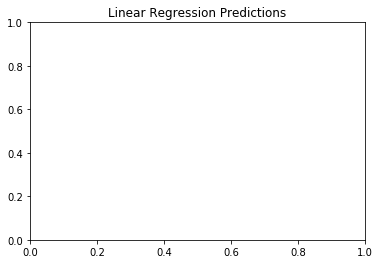

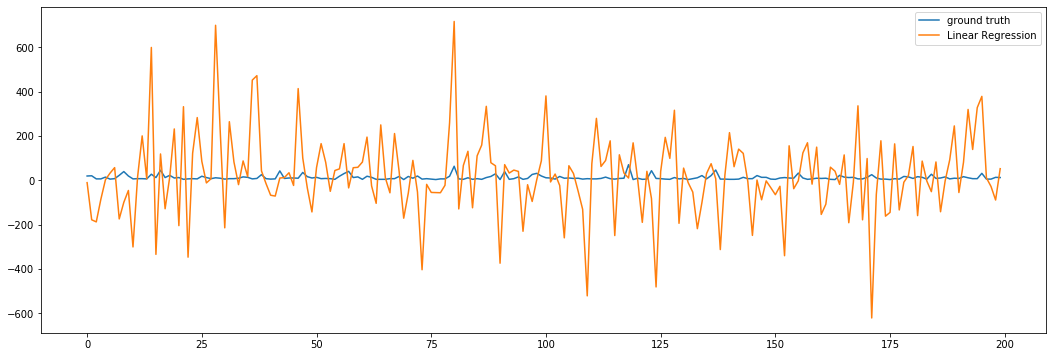

In [84]:
plt.title("Linear Regression Predictions")
plt.figure(figsize=(18,6))
plt.plot(range(200), list(y_test), label='ground truth')
plt.plot(range(200), list(preds), label='Linear Regression')
plt.legend()
plt.show()

## Random Forest

In [85]:
randomforest = RandomForestRegressor()
randomforest.fit(x_train, y_train)

RandomForestRegressor()

In [86]:
forestpreds = randomforest.predict(x_test)

In [87]:
rms_err = np.sqrt(mean_squared_error(forestpreds, y_test))
print(rms_err)

10.767592940197622


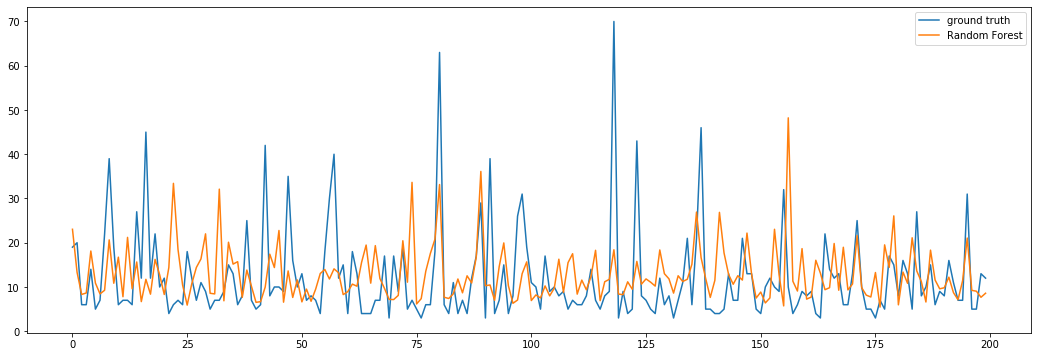

In [88]:
plt.figure(figsize=(18,6))
plt.plot(range(200), list(y_test), label='ground truth')
plt.plot(range(200), list(forestpreds), label='Random Forest')
plt.legend()
plt.show()

## Neural Network(Deep Learning)

In [89]:
print(type(x_train))
x_train = x_train.toarray()
print(x_train)

<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 1 0 0]]


In [90]:
print(len(x_train))
print(len(x_train[0]))

800
1000


In [91]:
import keras
from keras.models import Sequential
from keras.layers import Flatten, Conv1D, Dense, MaxPooling1D, Activation, Embedding, Dropout

nnmodel = Sequential()

nnmodel.add(Embedding(1000, 64, input_length=1000))

nnmodel.add(MaxPooling1D())

#nnmodel.add(Conv1D(filters = 32, kernel_size = (3),padding = 'Same',activation ='relu', input_shape = (1, 1000, 1)))
nnmodel.add(Dense(64))

nnmodel.add(Dropout(0.5))

#nnmodel.add(Conv1D(filters = 64, kernel_size = (3),padding = 'Same',activation ='relu'))

nnmodel.add(Flatten())
nnmodel.add(Dense(256))
nnmodel.add(Activation('relu'))
nnmodel.add(Dense(1, activation = "linear"))
    

nnmodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1000, 64)          64000     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 500, 64)           0         
_________________________________________________________________
dense_6 (Dense)              (None, 500, 64)           4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 64)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               8192256   
_________________________________________________________________
activation_2 (Activation)    (None, 256)              

In [92]:
nnmodel.compile(loss='MSE',
             optimizer='adam',
             metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [93]:
history = nnmodel.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
25/25 [==============================] - 2s 59ms/step - loss: 203.2435 - root_mean_squared_error: 14.1731
Epoch 2/10
25/25 [==============================] - 2s 63ms/step - loss: 138.4236 - root_mean_squared_error: 11.7453
Epoch 3/10
25/25 [==============================] - 2s 63ms/step - loss: 118.5270 - root_mean_squared_error: 10.8108
Epoch 4/10
25/25 [==============================] - 1s 59ms/step - loss: 128.1982 - root_mean_squared_error: 11.2658
Epoch 5/10
25/25 [==============================] - 1s 59ms/step - loss: 126.8135 - root_mean_squared_error: 11.2376
Epoch 6/10
25/25 [==============================] - 2s 60ms/step - loss: 121.4862 - root_mean_squared_error: 10.9600
Epoch 7/10
25/25 [==============================] - 2s 62ms/step - loss: 125.0745 - root_mean_squared_error: 11.1174
Epoch 8/10
25/25 [==============================] - 1s 56ms/step - loss: 92.6592 - root_mean_squared_error: 9.5390
Epoch 9/10
25/25 [==============================] - 1s 58ms/step -

Loss on last epoch:  86.13958740234375


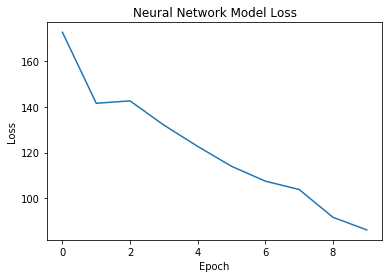

In [94]:
plt.title("Neural Network Model Loss")
plt.plot(history.history['loss'])
plt.ylabel("Loss")
plt.xlabel("Epoch")
print("Loss on last epoch: ", history.history['loss'][9])

In [95]:
x_test = x_test.toarray()
nnpreds = nnmodel.predict(x_test)

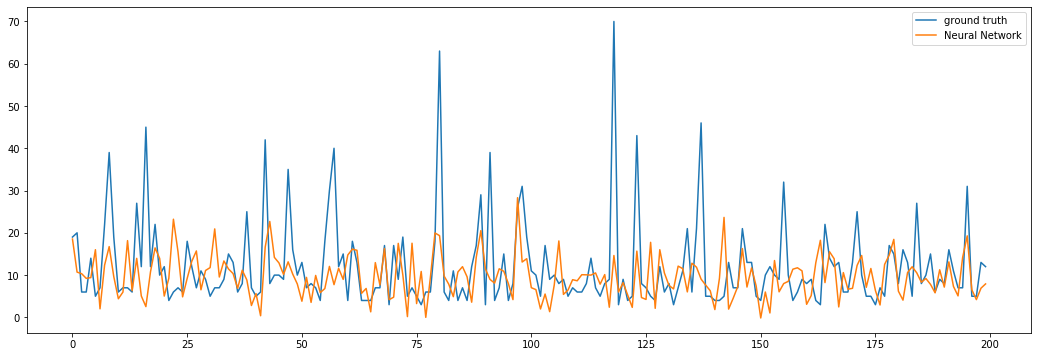

In [96]:
plt.figure(figsize=(18,6))
plt.plot(range(200), list(y_test), label='ground truth')
#plt.plot(range(200), list(forestpreds), label='Random Forest')
plt.plot(range(200), list(nnpreds), label='Neural Network')
plt.legend()
plt.show()

# Combined Data

In [108]:
import pandas as pd
import glob

all_files = glob.glob(gpath + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [109]:
frame.shape

(2266098, 21)

In [110]:
frame.head()

,created_utc,score,domain,id,title,ups,downs,num_comments,permalink,selftext,...,over_18,thumbnail,subreddit_id,edited,link_flair_css_class,author_flair_css_class,is_self,name,url,distinguished
0,1.339283e+09,537,self.ExplainLikeImCalvin,utspq,ELIC: How come I can't upvote any of the posts...,599,62,10,http://www.reddit.com/r/ExplainLikeImCalvin/co...,"Because it builds character, that's why.",...,False,NaN,t5_2sp85,False,NaN,NaN,True,t3_utspq,http://www.reddit.com/r/ExplainLikeImCalvin/co...,NaN
1,1.338926e+09,543,self.ExplainLikeImCalvin,umlwz,Why are there holes in bricks?,651,108,171,http://www.reddit.com/r/ExplainLikeImCalvin/co...,I'm talking about the red bricks they make hou...,...,False,NaN,t5_2sp85,False,NaN,NaN,True,t3_umlwz,http://www.reddit.com/r/ExplainLikeImCalvin/co...,NaN
2,1.358382e+09,483,self.ExplainLikeImCalvin,16pvim,Some people here have obviously never read Cal...,529,46,32,http://www.reddit.com/r/ExplainLikeImCalvin/co...,Let me start off by saying that this is defini...,...,False,NaN,t5_2sp85,1358809924.0,NaN,NaN,True,t3_16pvim,http://www.reddit.com/r/ExplainLikeImCalvin/co...,NaN
3,1.332358e+09,278,self.ExplainLikeImCalvin,r76ts,So this is my default user style for this subr...,296,18,51,http://www.reddit.com/r/ExplainLikeImCalvin/co...,So I was bored and decided to use a user style...,...,False,NaN,t5_2sp85,False,NaN,NaN,True,t3_r76ts,http://www.reddit.com/r/ExplainLikeImCalvin/co...,NaN
4,1.350278e+09,264,self.ExplainLikeImCalvin,11hyqb,"ELIC: If people are beautiful on the inside, w...",318,54,24,http://www.reddit.com/r/ExplainLikeImCalvin/co...,NaN,...,True,NaN,t5_2sp85,False,NaN,NaN,True,t3_11hyqb,http://www.reddit.com/r/ExplainLikeImCalvin/co...,NaN


In [111]:
frame.drop(labels=['domain', 'id', 'permalink', 'num_comments', 'over_18', 'thumbnail', 'created_utc', 'subreddit_id', 'edited', 'link_flair_css_class', 'author_flair_css_class', 'is_self', 'name', 'url', 'link_flair_text', 'distinguished'], inplace=True, axis=1)

In [112]:
frame = frame.replace(np.nan, '', regex=True)

In [113]:
frame['combined']=frame['title']+frame['selftext']

In [114]:
frame.head(10)

,score,title,ups,downs,selftext,combined
0,537,ELIC: How come I can't upvote any of the posts...,599,62,"Because it builds character, that's why.",ELIC: How come I can't upvote any of the posts...
1,543,Why are there holes in bricks?,651,108,I'm talking about the red bricks they make hou...,Why are there holes in bricks?I'm talking abou...
2,483,Some people here have obviously never read Cal...,529,46,Let me start off by saying that this is defini...,Some people here have obviously never read Cal...
3,278,So this is my default user style for this subr...,296,18,So I was bored and decided to use a user style...,So this is my default user style for this subr...
4,264,"ELIC: If people are beautiful on the inside, w...",318,54,,"ELIC: If people are beautiful on the inside, w..."
5,232,ELIC: What's a hipster?,269,37,,ELIC: What's a hipster?
6,223,A perfect example of Calvin's Dad doing what h...,259,36,http://www.gocomics.com/calvinandhobbes/2012/0...,A perfect example of Calvin's Dad doing what h...
7,191,Why is Calvinball not an Olympic sport? Who sh...,220,29,,Why is Calvinball not an Olympic sport? Who sh...
8,195,ELIC - Why do I have to eat my vegetables?,209,14,,ELIC - Why do I have to eat my vegetables?
9,158,"LIC: How come pizza is delivered, but we have ...",172,14,,"LIC: How come pizza is delivered, but we have ..."


In [115]:
from sklearn.feature_extraction.text import HashingVectorizer

X = frame['combined']
y = frame['score']

real_text = X
metric_score = y

x_train_ex, x_test_ex, y_train_ex, y_test_ex = train_test_split(real_text, metric_score, test_size = 0.2, random_state = 79)

vectorizer = CountVectorizer(analyzer=tokenize, max_features = 1000).fit(X)


In [116]:
X = vectorizer.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 79)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1812878, 1000) (1812878,) (453220, 1000) (453220,)


## Linear Regression Model - All data

In [206]:
model = linear_model.LinearRegression(fit_intercept=True)
model.fit(x_train, y_train)

preds = model.predict(x_test)
print(len(y_test))
print(len(preds))

from sklearn.metrics import mean_squared_error
rms_err = np.sqrt(mean_squared_error(preds, y_test))
print(rms_err)

453220
453220
403.1127652851054


/Users/junokim/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


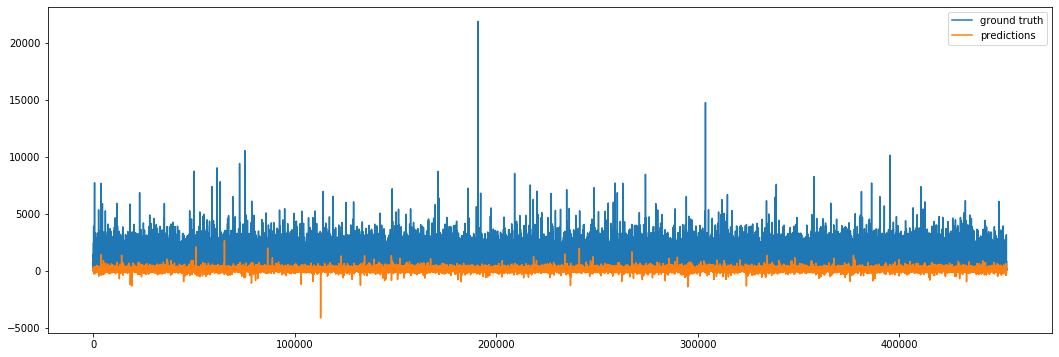

In [207]:
plt.figure(figsize=(18,6))
plt.plot(range(len(preds)), list(y_test), label='ground truth')
plt.plot(range(len(preds)), list(preds), label='predictions')
plt.legend()
plt.show()

## Random Forest Model - All data

In [ ]:
randomforest = RandomForestRegressor(max_depth = 1)
print("checkpoint")
randomforest.fit(x_train, y_train)

checkpoint


In [ ]:
forestpreds = randomforest.predict(x_test)
print("checkpoint")
rms_err = np.sqrt(mean_squared_error(forestpreds, y_test))
print(rms_err)

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(range(len(forestpreds)), list(y_test), label='ground truth')
plt.plot(range(len(forestpreds)), list(forestpreds), label='predictions')
plt.legend()
plt.show()

## Neural Network Model - All data

In [117]:
print(type(x_train))
x_train = x_train.toarray()
print(x_train)

<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [118]:
import keras
from keras.models import Sequential
from keras.layers import Flatten, Conv1D, Dense, MaxPooling1D, Activation, Embedding, Dropout

nnmodel = Sequential()

nnmodel.add(Embedding(1000, 64, input_length=1000))

nnmodel.add(MaxPooling1D())

#nnmodel.add(Conv1D(filters = 32, kernel_size = (3),padding = 'Same',activation ='relu', input_shape = (1, 1000, 1)))
nnmodel.add(Dense(64))

nnmodel.add(Dropout(0.5))

#nnmodel.add(Conv1D(filters = 64, kernel_size = (3),padding = 'Same',activation ='relu'))

nnmodel.add(Flatten())
nnmodel.add(Dense(256))
nnmodel.add(Activation('relu'))
nnmodel.add(Dense(1, activation = "linear"))
    

nnmodel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 1000, 64)          64000     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 500, 64)           0         
_________________________________________________________________
dense_9 (Dense)              (None, 500, 64)           4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 500, 64)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 32000)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               8192256   
_________________________________________________________________
activation_3 (Activation)    (None, 256)              

In [119]:
nnmodel.compile(loss='MSE',
             optimizer='adam',
             metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [120]:
history = nnmodel.fit(x_train, y_train, batch_size=64, epochs=1, verbose=1)

28327/28327 [==============================] - 2200s 78ms/step - loss: 158728.5393 - root_mean_squared_error: 398.3973


158245.515625


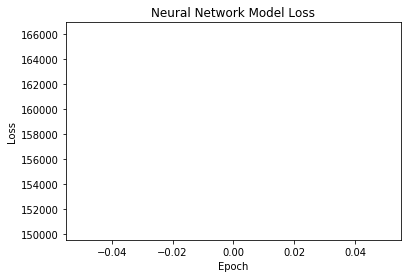

In [121]:
plt.title("Neural Network Model Loss")
plt.plot(history.history['loss'])
plt.ylabel("Loss")
plt.xlabel("Epoch")
print(history.history['loss'][0])

In [122]:
x_test = x_test.toarray()
nnpreds = nnmodel.predict(x_test)

/Users/junokim/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


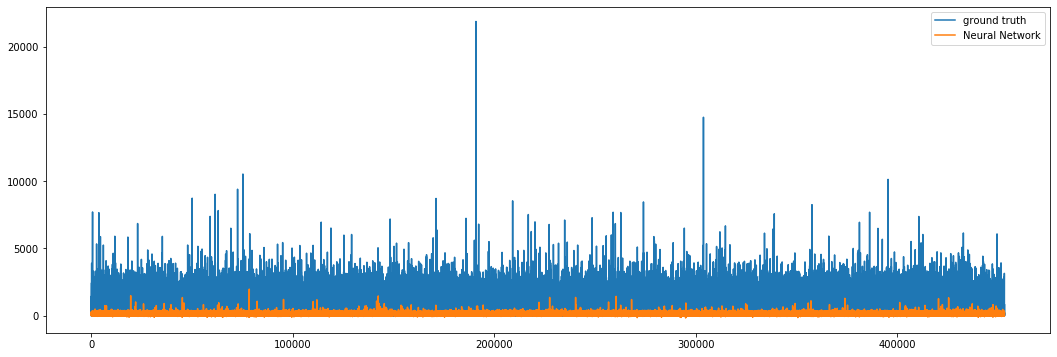

In [123]:
plt.figure(figsize=(18,6))
plt.plot(range(len(nnpreds)), list(y_test), label='ground truth')
#plt.plot(range(200), list(forestpreds), label='Random Forest')
plt.plot(range(len(nnpreds)), list(nnpreds), label='Neural Network')
plt.legend()
plt.show()

### Saving RMSE Graph

In [ ]:
#%matplotlib inline
#import matplotlib.pyplot as plt

#fig = plt.figure(figsize=(18, 6))
#ax = fig.add_axes([0.1,0.1,0.75,0.75])
#ax.set_title('RMSE of Models on Combined Data')
#ax.set_ylabel('RMSE')
#ax.set_xlabel('Model')
#models = ['Linear','Random Forest', 'Neural Network']
#rmse = [178.66, 13.22, 8.10]
#rmse_combined = [402.61,405.19,394.26]
#plt.bar(models, rmse_combined)
#plt.savefig('RMSE-Model.png')

In [ ]:
#plt.savefig('RMSE-Model.png')

Graph of 10 posts with upvote predictions

In [132]:
print(preds)

[ -10.98355374 -178.45703193 -187.87450283  -85.60662541    2.36584232
   32.06489869   56.76067218 -174.49526987  -99.71934622  -46.26236848
 -300.86143152   14.42601125  199.8159379     5.9364577   598.68426776
 -334.35179753  118.38345543 -128.69937834   13.20029532  231.15653968
 -204.78147536  331.5011948  -346.97844243  121.91816508  282.47069638
   85.41579195  -12.20183014    6.66838684  698.53641964  226.77519092
 -214.66711934  263.85691855   82.52891367  -19.92176865   86.9687013
   16.06354689  451.43365529  471.4077934    42.11197201  -15.53400088
  -67.70448227  -71.50634607    9.78709056   11.96419599   33.7406898
  -23.60594875  413.15126699  100.1436169   -35.8225552  -143.00336177
   56.80094638  164.93139661   80.47958186  -50.04823797   43.85278521
   51.16584123  164.97655404  -34.63777283   56.42906453   58.17899005
   81.89214992  194.40464073  -25.60894025 -104.24113094  249.40382999
   10.85029764  -56.77146524  210.45306074   39.7885528  -171.18038282
  -58.19

In [133]:
print(forestpreds)

[23.04       13.31566667  8.32        8.64133333 18.13       10.88666667
  8.44        9.26       20.64333333 10.85       16.74        7.8
 21.21        9.61       15.65        6.7        11.73        8.38
 16.23890476 12.76        8.31       14.4        33.42       18.48
 10.44        5.91       10.74383333 14.41693651 16.34       22.01
  8.58        8.44       32.11        6.88       20.11666667 15.17
 15.72        7.66       13.82702381 10.17        6.5305      6.69
  9.97745238 17.41242857 14.39421429 22.77        6.57       13.63
  7.64       11.6         6.64        9.52        6.77        9.52
 13.05       13.9549127  11.81       14.10292857 13.20419841  8.28
  8.94860317 10.65       10.17650794 15.54       19.47766667 10.87
 19.34666667 11.92        9.68038095  7.20571429  7.1575      8.1
 20.45333333 11.09       33.64166667  6.17        7.3625     13.57
 17.58583333 20.8        33.15        7.69        7.4         8.46
 11.808       8.68345238 12.53       10.91       16.77    

In [134]:
print(nnpreds)

[[103.64965 ]
 [202.53658 ]
 [176.84526 ]
 ...
 [169.74171 ]
 [129.05104 ]
 [  3.919554]]


In [135]:
real = y_test

In [136]:
real = real.to_numpy()

In [137]:
print(type(real))

<class 'numpy.ndarray'>


In [202]:
print(real.shape)

(453220,)


In [201]:
print(preds.shape)

(200,)


In [203]:
print(forestpreds.shape)

(200,)


In [204]:
print(nnpreds.shape)

(453220, 1)


In [185]:
print(real.shape)

(453220,)


In [205]:
print(x_test.shape)

(453220, 1000)


In [148]:
print(x_test_ex)

1246315    Took 5 hits of acid 20 mins agochilling at my ...
952854                                  Am I doing it right?
2096952                     Plants and Animals of Enochronia
346625     Above &amp; Beyond vs Audien - Alchemy Wayfare...
1873443    US - Complete a short consumer behavior study ...
                                 ...                        
1814492    [Season 3 spoilers] Full Emmy Panel 2013 with ...
2033808                             CHIRP CHIRP MOTHERFUCKER
183513          Can someone critique my logo design? Thanks.
2022833    CWM: A commandline program to test and train c...
1606186    Nexus 4 Non-Flip Wallet CaseThere seem to be l...
Name: combined, Length: 453220, dtype: object


In [166]:
print(x_test_ex.keys().unique)

<bound method Index.unique of Int64Index([1246315,  952854, 2096952,  346625, 1873443, 1926247, 2118398,
             390738, 1733991,  133424,
            ...
            1757754, 1684441, 2184930, 1703596, 1429795, 1814492, 2033808,
             183513, 2022833, 1606186],
           dtype='int64', length=453220)>


In [199]:
import random

for i in range(10):
    ind = random.choice(x_test_ex.keys().unique())
    print(ind)
    print("text: ", x_test_ex[ind])
    print("real: ", real[ind])
    print("baseline: ", preds[ind])
    print("forest: ", forestpreds[ind])
    print("neural network: ", nnpreds[ind][0])

227458
text:  MIT Scientist Captures 90,000 Hours of Video of His Son's First Words, Graphs It
real:  5


IndexError: index 227458 is out of bounds for axis 0 with size 200

In [200]:
frame

,score,title,ups,downs,selftext,combined
0,537,ELIC: How come I can't upvote any of the posts...,599,62,"Because it builds character, that's why.",ELIC: How come I can't upvote any of the posts...
1,543,Why are there holes in bricks?,651,108,I'm talking about the red bricks they make hou...,Why are there holes in bricks?I'm talking abou...
2,483,Some people here have obviously never read Cal...,529,46,Let me start off by saying that this is defini...,Some people here have obviously never read Cal...
3,278,So this is my default user style for this subr...,296,18,So I was bored and decided to use a user style...,So this is my default user style for this subr...
4,264,"ELIC: If people are beautiful on the inside, w...",318,54,,"ELIC: If people are beautiful on the inside, w..."
...,...,...,...,...,...,...
2266093,93,Anyone else want one? [FJ],120,27,,Anyone else want one? [FJ]
2266094,88,"As requested, more of my GF's feet! An old one...",103,15,,"As requested, more of my GF's feet! An old one..."
2266095,89,My red toes! (x-post from GW) ;),120,31,,My red toes! (x-post from GW) ;)
2266096,92,Just the tip,112,20,,Just the tip
